<a href="https://colab.research.google.com/github/masa512/ece558/blob/main/hw4_p6_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part D

In [ ]:
from skimage.data import shepp_logan_phantom 
from skimage.transform import resize,radon
import matplotlib.pyplot as plt
import numpy as np

N = 32 # pick whatever size
X = resize(shepp_logan_phantom(), (N,N))

Text(0.5, 1.0, '32 by 32 Phantom Input')

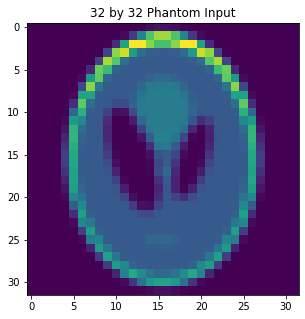

In [ ]:
# Plot the image
f = plt.figure(figsize=(5,5))
plt.imshow(X)
plt.title(f"{N} by {N} Phantom Input")

In [ ]:
# Now we will define the function to generate the T matrix
def projmtx(N,thetas):
  #Initialize bj's as columns
  B = np.diag(np.ones(N*N))
  M = thetas.shape[0]
  # Radon returns t by ang
  sinos = np.array([radon(B[:,j].reshape(N,N),theta=thetas,circle=False).reshape((-1)) for j in range(N*N)]).T
  
  return sinos

In [ ]:
thetas = np.linspace(0., 180., N, endpoint=False).reshape((-1,1))
T = projmtx(N,thetas)

/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],


(1472, 1)


Text(0.5, 1.0, 'skimage')

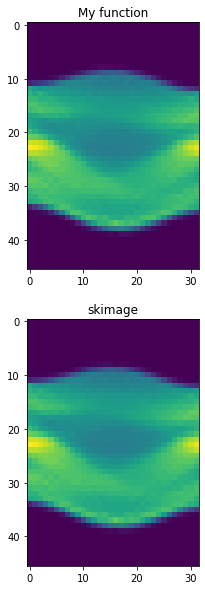

In [ ]:
# Apply the matrix for the input given
x = X.reshape((-1,1))
y = T @ x

# Print y shape
print(y.shape)

# Reshape y to shoot out t by ang
Y = y.reshape(-1,thetas.shape[0])

# We will also generate one using the built in skimage function 
Y_gt = radon(X,thetas,circle=False)

# Print the resulting sinogram
f,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
ax1.imshow(Y)
ax1.set_title("My function")
ax2.imshow(Y_gt)
ax2.set_title("skimage")

# Part E 

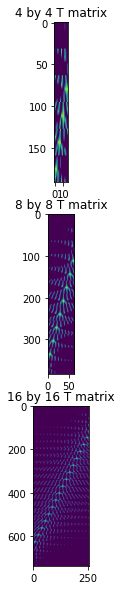

In [13]:
# We will just plot the T for N = 4,8,16

Ns = [4,8,16]
f,axes = plt.subplots(3,1,figsize=(30,10))

for i,ax in enumerate(axes):
  N = Ns[i]
  ax.imshow(projmtx(N,thetas))
  ax.set_title(f'{N} by {N} T matrix')


# Part F

/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],


Text(0.5, 1.0, 'Backprojected')

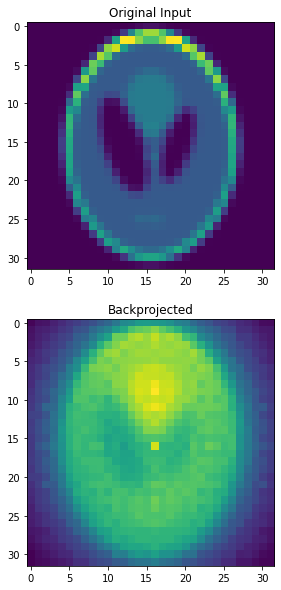

In [11]:
# Backprojection

N = 32 # pick whatever size
X = resize(shepp_logan_phantom(), (N,N))

# Forward
thetas = np.linspace(0., 180., N, endpoint=False).reshape((-1,1))
T = projmtx(N,thetas)

x = X.reshape((-1,1))
y = T @ x

# Backproj
x = T.T@y
Xbp = x.reshape(N,N)

# Plot
f,axes = plt.subplots(2,1,figsize=(10,10))
axes[0].imshow(X)
axes[0].set_title('Original Input')

axes[1].imshow(Xbp)
axes[1].set_title('Backprojected')